<a href="https://colab.research.google.com/github/Kushdevu/CODSOFT_INTERNSHIP/blob/main/TASK_5_CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CODSOFT INTERNSHIP**

TASK 2: CREDIT CARD FRAUD DETECTION

Done by: Devendra Kushwah


# **Project Summary -**

The goal of this project is to build a machine learning model to identify fraudulent credit card transactions accurately. Fraud detection is crucial for financial institutions to prevent significant financial losses and protect customers' assets.

The objective of this project is to develop a machine learning model to accurately identify fraudulent credit card transactions. This involves preprocessing and normalizing transaction data, addressing class imbalance, and training a classification model to distinguish between genuine and fraudulent transactions. The performance of the model will be evaluated using metrics such as precision, recall, and F1-score.

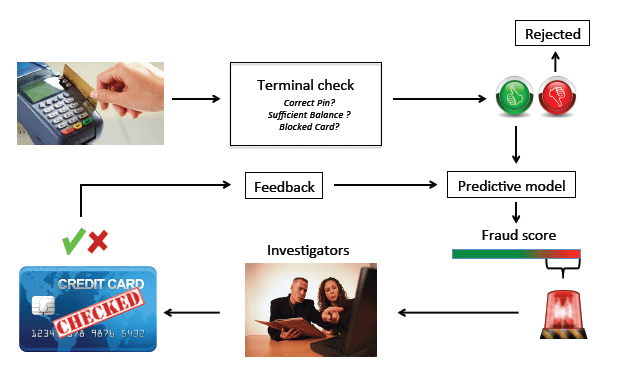

## PROBLEM STATEMENT

* Detect and prevent unauthorized individuals from exploiting someone's personal information to conduct deceitful transactions.

* Mitigate the risk of victims being held responsible for unauthorized purchases they never made.

* Address the potential accumulation of unresolved debts that victims might incur due to fraudulent activities.

* Prevent the negative impact on victims' credit scores, which can hinder their ability to secure new credit.

* Ensure rapid identification of fraudulent transactions by credit card companies to reduce the financial and emotional impact on victims.

* Handle the inherent class imbalance in fraud detection datasets, where fraudulent transactions are significantly less frequent than genuine ones.

* Develop a robust machine learning model with high precision, recall, and F1-score to accurately classify transactions as fraudulent or genuine.

## ADDRESSING THE PROBLEM

* Load the transaction dataset and inspect its structure to understand its composition.

* Identify and appropriately handle any missing values to maintain data quality.

* Normalize numerical features (e.g., transaction amounts) to ensure uniformity across the dataset.

* Divide the dataset into features (X) and labels (y), then split it into training and testing sets to ensure a balanced evaluation.

* Choose a suitable classification algorithm (e.g., Random Forest) known for handling imbalanced datasets effectively.

* Calculate performance metrics such as precision, recall, and F1-score to assess the model's ability to correctly identify fraudulent transactions while minimizing false positives and negatives.

* Measure the accuracy of the positive predictions made by the model (i.e., how many identified frauds are actual frauds).


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
data = pd.read_csv('/content/creditcard.csv')

### Dataset First View

In [53]:
# Dataset First Look
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


### Dataset Rows & Columns count

In [54]:
# Dataset Rows & Columns count
data.shape

(219902, 31)

### Dataset Information

In [55]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219902 entries, 0 to 219901
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    219902 non-null  float64
 1   V1      219901 non-null  float64
 2   V2      219901 non-null  float64
 3   V3      219901 non-null  float64
 4   V4      219901 non-null  float64
 5   V5      219901 non-null  float64
 6   V6      219901 non-null  float64
 7   V7      219901 non-null  float64
 8   V8      219901 non-null  float64
 9   V9      219901 non-null  float64
 10  V10     219901 non-null  float64
 11  V11     219901 non-null  float64
 12  V12     219901 non-null  float64
 13  V13     219901 non-null  float64
 14  V14     219901 non-null  float64
 15  V15     219901 non-null  float64
 16  V16     219901 non-null  float64
 17  V17     219901 non-null  float64
 18  V18     219901 non-null  float64
 19  V19     219901 non-null  float64
 20  V20     219901 non-null  float64
 21  V21     21

#### Duplicate Values

In [56]:
# Dataset Duplicate Value Count
num_duplicate_rows = data.duplicated().sum()

# Display the number of duplicate rows
print("Number of Duplicate Rows in the Movie dataset:", num_duplicate_rows)

Number of Duplicate Rows in the Movie dataset: 784


#### Missing Values/Null Values

In [57]:
# Missing Values/Null Values Count
missing_values_count = data.isnull().sum()
# Display the missing values count for each column
print("Missing Values Count:")
print(missing_values_count)

Missing Values Count:
Time      0
V1        1
V2        1
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


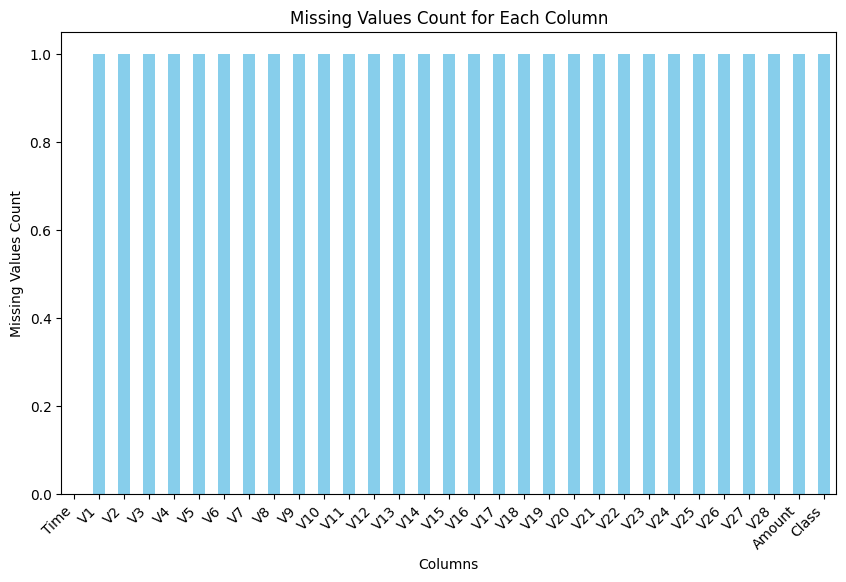

In [58]:
# Plotting missing values count for each column
plt.figure(figsize=(10, 6))
missing_values_count.plot(kind='bar', color='skyblue')
plt.title('Missing Values Count for Each Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## ***2. Understanding Your Variables***

In [59]:
# Dataset Columns
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [60]:
# Dataset Describe
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,219902.000000,219901.000000,219901.000000,219901.000000,219901.000000,219901.000000,219901.000000,219901.000000,219901.000000,219901.000000,...,219901.000000,219901.000000,219901.000000,219901.000000,219901.000000,219901.000000,219901.000000,219901.000000,219901.000000,219901.000000
mean,76711.139994,-0.075333,-0.010083,0.218796,0.052687,-0.074075,0.034776,-0.030965,0.005533,0.004797,...,-0.008171,-0.029120,-0.011377,0.001606,0.043929,0.003507,0.000529,0.002123,90.653311,0.001846
std,38225.475988,1.926909,1.647101,1.478182,1.408185,1.369190,1.318649,1.224617,1.207804,1.126640,...,0.744141,0.704469,0.621706,0.605242,0.503728,0.487088,0.398983,0.330836,250.594848,0.042929
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,46713.250000,-0.951604,-0.594653,-0.509174,-0.816060,-0.757524,-0.725924,-0.569370,-0.192259,-0.661398,...,-0.225914,-0.534217,-0.167744,-0.347464,-0.264600,-0.331208,-0.069041,-0.046385,6.000000,0.000000
50%,71612.500000,-0.047506,0.071512,0.404382,0.051985,-0.133960,-0.232694,0.005158,0.035236,-0.069001,...,-0.036972,-0.017313,-0.024718,0.048736,0.083229,-0.060696,0.004120,0.016643,23.310000,0.000000
75%,117080.500000,1.235139,0.781059,1.171378,0.850298,0.516394,0.436096,0.526210,0.332748,0.617666,...,0.164254,0.459694,0.123617,0.425593,0.376710,0.254696,0.089131,0.078156,79.940000,0.000000
max,141928.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


## 3. ***Data Wrangling***

In [61]:
# Remove duplicate rows
data = data.drop_duplicates()

In [62]:
#Handle Missing Values
data = data.fillna(data.median())

In [63]:
# Verify that there are no more duplicates
num_duplicate_rows = data.duplicated().sum()
print("Number of Duplicate Rows after cleaning:", num_duplicate_rows)

# Verify that there are no more missing values
missing_values_count = data.isnull().sum()
print("Missing Values Count after cleaning:")
print(missing_values_count)


Number of Duplicate Rows after cleaning: 0
Missing Values Count after cleaning:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## 4. ***EDA (Exploratory data Analysis)***

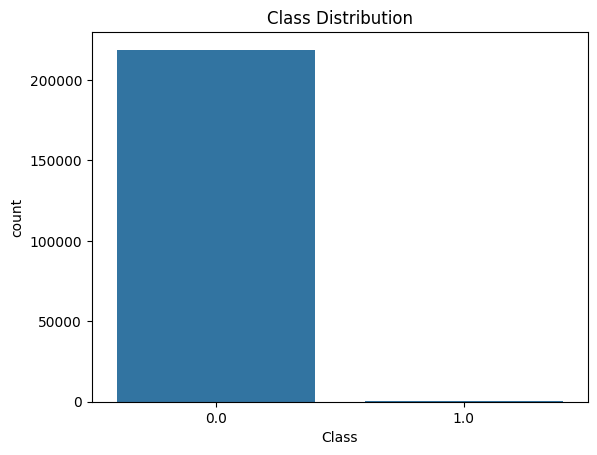

Class
0.0    99.822926
1.0     0.177074
Name: proportion, dtype: float64


In [64]:
# Plot the class distribution
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

# Display class distribution in percentages
class_counts = data['Class'].value_counts(normalize=True) * 100
print(class_counts)


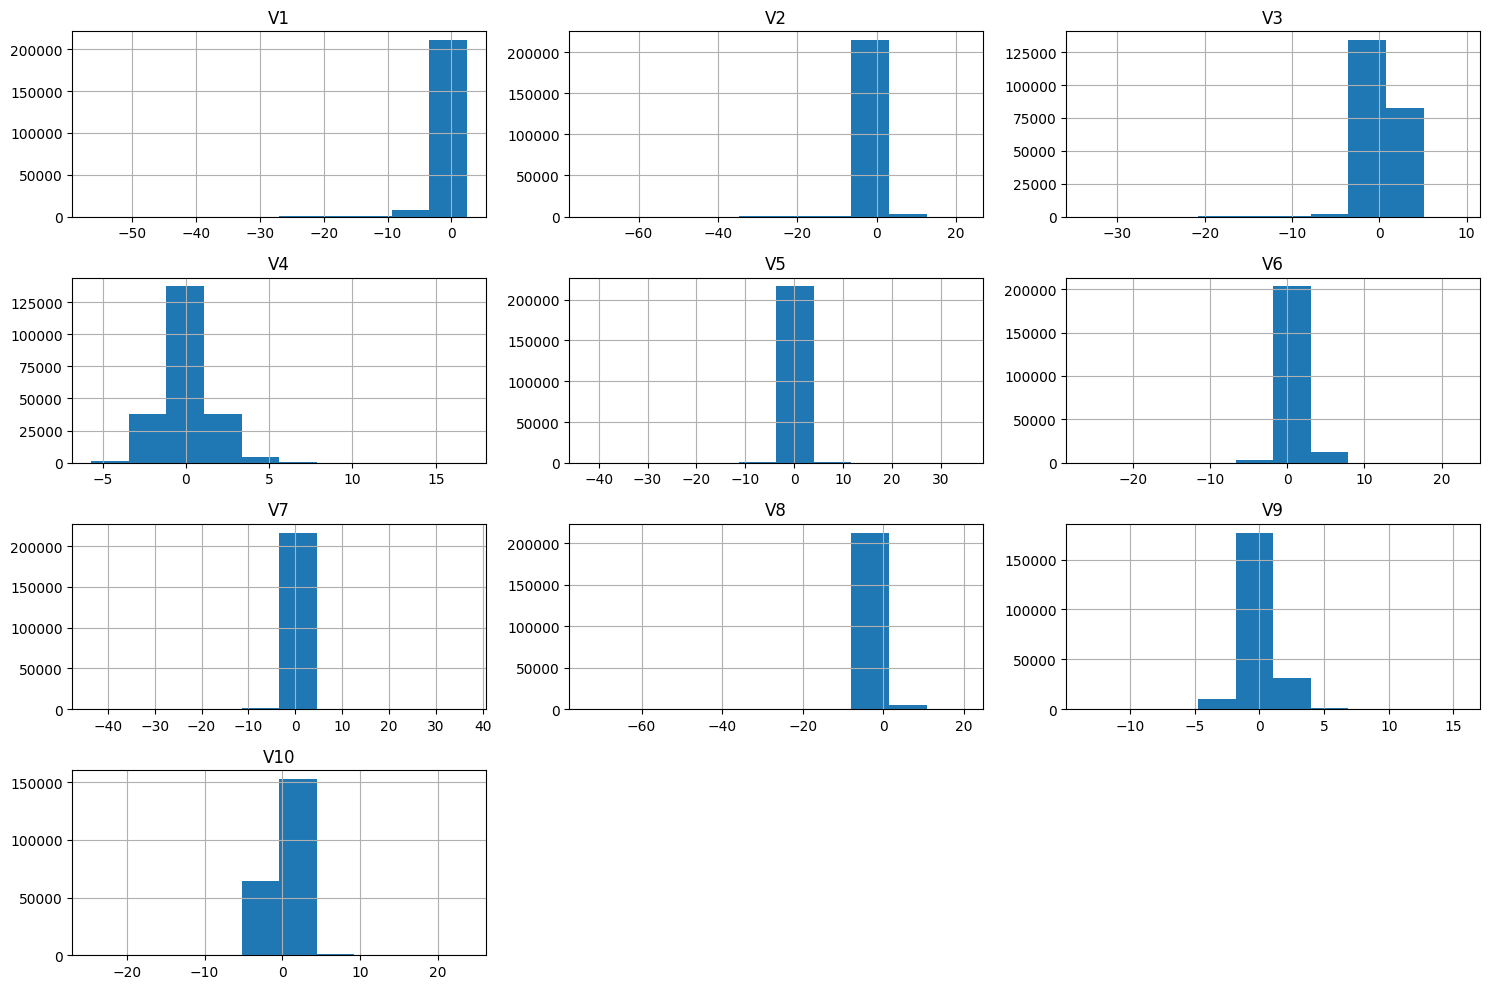

In [65]:
# Plot histograms for the first few features
data.iloc[:, 1:11].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


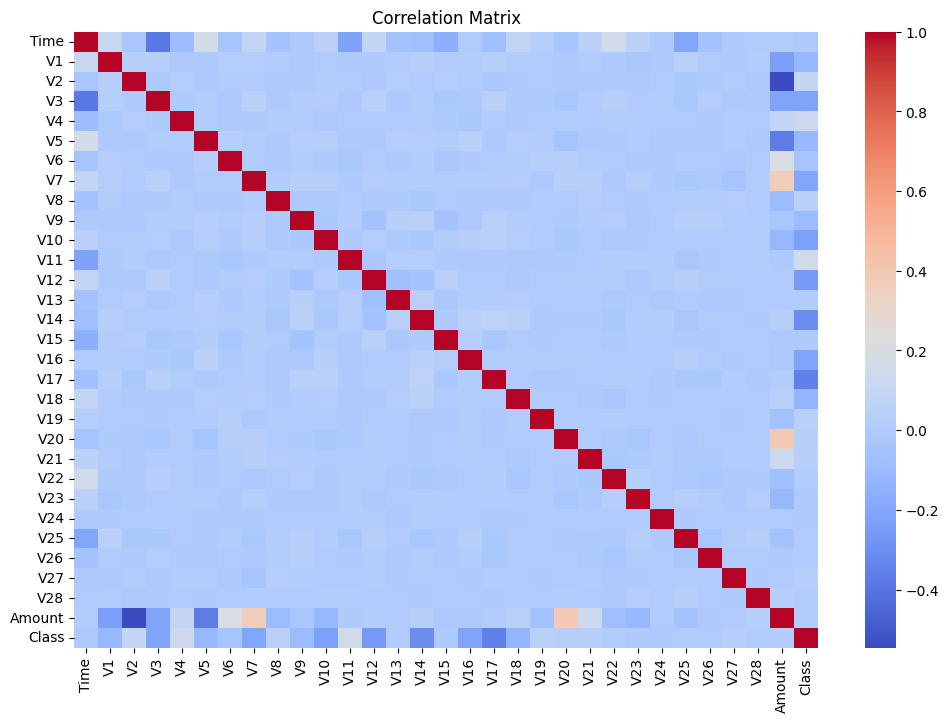

In [66]:
# Compute and plot the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


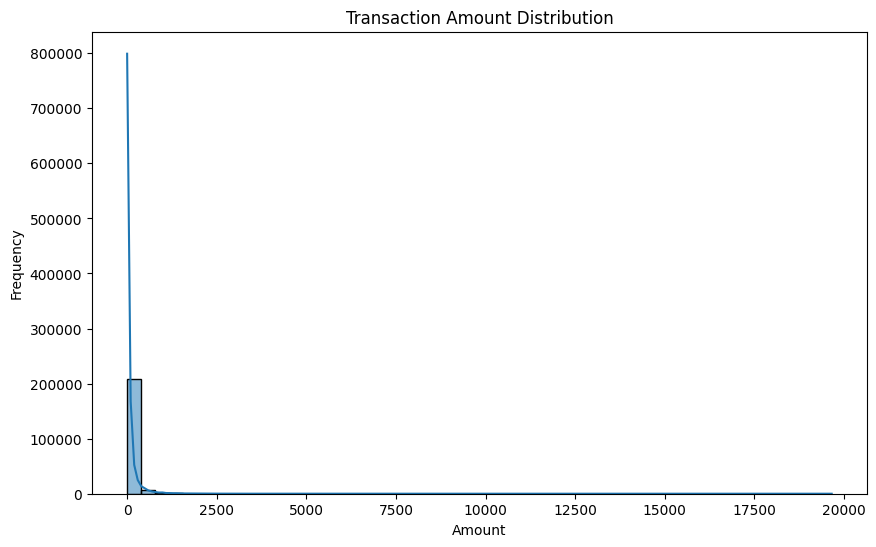

In [67]:
# Plot the distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


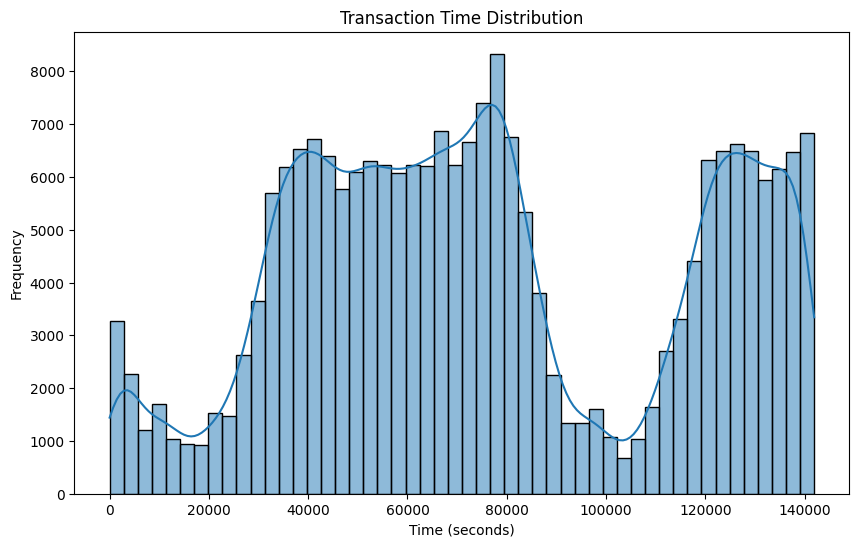

In [68]:
# Plot the distribution of transaction times
plt.figure(figsize=(10, 6))
sns.histplot(data['Time'], bins=50, kde=True)
plt.title('Transaction Time Distribution')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()



## 5. ***Feature Engineering***

In [69]:
from sklearn.preprocessing import StandardScaler

# Scale the 'Amount' feature
scaler = StandardScaler()
data['normalized_amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

# Drop the original 'Amount' column
data = data.drop(['Amount'], axis=1)

## 6. ***Model Building***

In [91]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Split the data into features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_res, y_train_res)


RandomForestClassifier(random_state=42)

## 7. ***Model Evaluation***

In [93]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("SMOTE Results:")
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1-score: {f1_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


SMOTE Results:
Accuracy: 0.9996120847024461
Precision: 0.9066666666666666
Recall: 0.8717948717948718
F1-score: 0.8888888888888887
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     43746
         1.0       0.91      0.87      0.89        78

    accuracy                           1.00     43824
   macro avg       0.95      0.94      0.94     43824
weighted avg       1.00      1.00      1.00     43824

